In [9]:
# 1. Pima Indian Diabetes 데이터 세트 diabetes.csv 파일을 불러오고 데이터의 평균, 표준편차, 4분위수를 체크하세요.
# 데이터프레임의 첫 다섯 행도 확인하세요.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('diabetes.csv')
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# 2. 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI' 변수에서 0인 값들을 평균 값으로 대체하세요.

zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
diabetes[zero_features]=diabetes[zero_features].replace(0, diabetes[zero_features].mean())

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

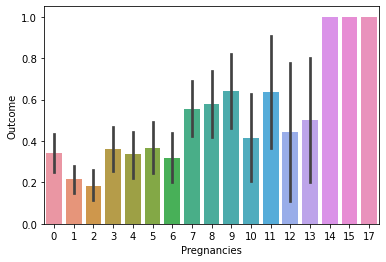

In [12]:
# 3. Pregnancies 별로 당뇨병에 걸린 비율을 나타낸 그래프를 그리세요.
sn.barplot(x='Pregnancies', y = 'Outcome', data=diabetes)

In [13]:
# 4. 데이터셋을 피처 데이터셋, 결과 데이터셋으로 나눠주세요.
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

In [20]:
# 5. MinMaxScaler 을 이용해 피처 데이트셋에 스케일링을 적용하고, train/test 데이터셋을 train_test_split을 이용하여
# 7:3으로 나눠주세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 11)


In [21]:
# 6. Logistic Regression을 이용하여 학습, 예측 한 뒤 accuracy_score 을 구하세요.

lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.7749


In [23]:
# 7. 해당 모델로 교차검증을 하고 평균 정확도를 구하세요.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X_scaled , y , cv=5)
print(np.mean(scores))

0.7656565656565656


In [24]:
# 8. 임곗값(threshold)을 0.52로 설정한 binarizer 을 생성하세요. 그리고 위에서 구한 logistic regression 모델의
# predict_proba() 예측 확률 array에서 positive(1)에 해당하는 컬럼을 binarize 하세요.
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.52)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
pred_52 = binarizer.fit_transform(pred_proba.reshape(-1,1)) 


In [28]:
# 9. 8번에서 구한 예측 결과를 토대로 confusion matrix, accuracy, precision, recall, f1, roc 값을 구하세요.

confusion = confusion_matrix(y_test, pred_52)
accuracy = accuracy_score(y_test, pred_52)
precision = precision_score(y_test, pred_52)
recall = recall_score(y_test, pred_52)
f1 = f1_score(y_test, pred_52)
roc_auc = roc_auc_score(y_test, pred_proba)
print(confusion, accuracy, precision, recall, f1, roc_auc)


[[138  11]
 [ 40  42]] 0.7792207792207793 0.7924528301886793 0.5121951219512195 0.6222222222222222 0.8672450482894091
